In [25]:
import json
with open(r'C:\Users\coram\Documents\programing\geog4057\project\data\no_tax.json') as file:
    tax_json = json.load(file)

In [26]:
print((tax_json['data'][0]))

['row-69eh-dt2h-vwz3', '00000000-0000-0000-A344-B176ECD7FE9B', 0, 1628101573, None, 1628101573, None, '{ }', 'MULTIPOLYGON (((-90.092842237961 29.969376832976, -90.09206523793 29.970255834178, -90.091376237438 29.971000834423, -90.090628237821 29.971830834325, -90.090391236797 29.972100835188, -90.089449236358 29.971550834873, -90.088767236134 29.971163834089, -90.087926235745 29.970586834355, -90.08705723576 29.970059834233, -90.086135234355 29.969567833971, -90.084839233564 29.968734834088, -90.084580233207 29.968568833541, -90.085052233499 29.968045833564, -90.085633233463 29.967421833521, -90.085799233941 29.967243833329, -90.086482234167 29.966464832285, -90.087242234263 29.965596832431, -90.0873702349 29.965447831869, -90.087512234348 29.965550832148, -90.088310235279 29.96610083245, -90.088882235725 29.966494831847, -90.089729235653 29.967051832427, -90.090544236508 29.967635832383, -90.0913742373 29.968210832951, -90.092028237156 29.96865283276, -90.092964238289 29.969231833465

In [27]:
for i in tax_json['data'][0]:
    print(i)

row-69eh-dt2h-vwz3
00000000-0000-0000-A344-B176ECD7FE9B
0
1628101573
None
1628101573
None
{ }
MULTIPOLYGON (((-90.092842237961 29.969376832976, -90.09206523793 29.970255834178, -90.091376237438 29.971000834423, -90.090628237821 29.971830834325, -90.090391236797 29.972100835188, -90.089449236358 29.971550834873, -90.088767236134 29.971163834089, -90.087926235745 29.970586834355, -90.08705723576 29.970059834233, -90.086135234355 29.969567833971, -90.084839233564 29.968734834088, -90.084580233207 29.968568833541, -90.085052233499 29.968045833564, -90.085633233463 29.967421833521, -90.085799233941 29.967243833329, -90.086482234167 29.966464832285, -90.087242234263 29.965596832431, -90.0873702349 29.965447831869, -90.087512234348 29.965550832148, -90.088310235279 29.96610083245, -90.088882235725 29.966494831847, -90.089729235653 29.967051832427, -90.090544236508 29.967635832383, -90.0913742373 29.968210832951, -90.092028237156 29.96865283276, -90.092964238289 29.969231833465, -90.0928422379

In [28]:
import arcpy
geom = arcpy.FromWKT(tax_json['data'][100][8])

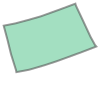

In [29]:
geom

In [30]:
import os
fcname = 'notax_fc.shp'
workspace = r'C:\Users\coram\Documents\programing\geog4057\project'
fc_fullname = os.path.join(workspace,fcname)
if arcpy.Exists(fc_fullname):
    arcpy.management.Delete(fc_fullname)

arcpy.management.CreateFeatureclass(out_path=workspace,out_name=fcname,
                                    geometry_type='POLYGON',
                                    spatial_reference=4269)

<Result 'C:\\Users\\coram\\Documents\\programing\\geog4057\\project\\notax_fc.shp'>

In [31]:
desc = arcpy.da.Describe(fc_fullname)
for field in desc['fields']:
    print(field.name)

FID
Shape
Id


#exploring the metadata

In [32]:
fields = tax_json['meta']['view']['columns']
for field in fields:
     print(field['fieldName'])

:sid
:id
:position
:created_at
:created_meta
:updated_at
:updated_meta
:meta
the_geom
objectid
geoid
clusterlet
shape_starea
shape_stlength


In [33]:
fields = tax_json['meta']['view']['columns']
field_names = []
for ind, field in enumerate(fields):
    
    name = field['fieldName']
    if name == 'the_geom':
        continue
    if ':' in name:
        name = name.split(':')[1]
    if name.lower() == 'id':
        name = 'id2'
    if len(name) > 10:
        name = name[:10]
    field_names.append(name)
field_names 

['sid',
 'id2',
 'position',
 'created_at',
 'created_me',
 'updated_at',
 'updated_me',
 'meta',
 'objectid',
 'geoid',
 'clusterlet',
 'shape_star',
 'shape_stle']

In [34]:
field_type = ['TEXT','TEXT','LONG',
              'LONG','TEXT','LONG',
              'TEXT','TEXT','TEXT',
              'TEXT','TEXT','TEXT','TEXT']
len(field_type)

13

In [35]:
for ind,field_name in enumerate(field_names):
    arcpy.management.AddField(fc_fullname,field_name=field_name,field_type=field_type[ind])



In [36]:
field_names.append('SHAPE@')
field_names

['sid',
 'id2',
 'position',
 'created_at',
 'created_me',
 'updated_at',
 'updated_me',
 'meta',
 'objectid',
 'geoid',
 'clusterlet',
 'shape_star',
 'shape_stle',
 'SHAPE@']

write records to the feature class

In [37]:
with arcpy.da.InsertCursor(fc_fullname,
                           field_names=field_names) as cursor:
    for row in tax_json['data']:
        new_row = []
        for ind, value in enumerate(row):
            if ind == 8:
                continue
            if value == None:
                value = ""
            new_row.append(value)
        geom = arcpy.FromWKT(row[8])
        new_row.append(geom)
        cursor.insertRow(new_row)

In [ ]:
import json
import arcpy
import os

def jsonToFC(input_file, output_fc):
    # Load the JSON file
    with open(input_file) as file:
        tax_json = json.load(file)

    workspace = os.path.dirname(output_fc)
    fcname = os.path.basename(output_fc)
    if arcpy.Exists(output_fc):
        arcpy.management.Delete(output_fc)

    arcpy.management.CreateFeatureclass(out_path=workspace, out_name=fcname,
                                        geometry_type='POLYGON',
                                        spatial_reference=4269)

    fields = tax_json['meta']['view']['columns']
    field_names = []
    for ind, field in enumerate(fields):
        name = field['fieldName']
        if name == 'the_geom':
            continue
        if ':' in name:
            name = name.split(':')[1]
        if name.lower() == 'id':
            name = 'id2'
        if len(name) > 10:
            name = name[:10]
        field_names.append(name)

    field_type = ['TEXT', 'TEXT', 'LONG',
                  'LONG', 'TEXT', 'LONG',
                  'TEXT', 'TEXT', 'TEXT',
                  'TEXT', 'TEXT', 'TEXT', 'TEXT']

    for ind, field_name in enumerate(field_names):
        arcpy.management.AddField(output_fc, field_name=field_name, field_type=field_type[ind])

    field_names.append('SHAPE@')

    with arcpy.da.InsertCursor(output_fc, field_names=field_names) as cursor:
        for row in tax_json['data']:
            new_row = []
            for ind, value in enumerate(row):
                if ind == 8:  # Skip geometry field
                    continue
                if value is None:
                    value = ""
                new_row.append(value)
            geom = arcpy.FromWKT(row[8])
            new_row.append(geom)
            cursor.insertRow(new_row)

def main():
    input_file = r'C:\Users\coram\Documents\programing\geog4057\project\data\no_tax.json'
    output_fc = r'C:\Users\coram\Documents\programing\geog4057\project\notax_fc.shp'
    jsonToFC(input_file, output_fc)

if __name__ == "__main__":
    main()